In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ast
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Set random seed for reproducibility
import random


random.seed(33)
np.random.seed(33)

# If you're using TensorFlow or PyTorch, you might also want to set their seeds:
# import tensorflow as tf
# tf.random.set_seed(33)

# import torch
# torch.manual_seed(33)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajaykallepalli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Linear Regression Analysis: New York City Rental Prices

## 1. Data Loading and Cleaning

In this first step, we'll load our dataset and perform initial data cleaning and preprocessing. This is a crucial step to ensure our data is ready for analysis and modeling.

### 1.1 Loading the Dataset

We start by loading our cleaned dataset 'rent_cleaned_1.csv'. This dataset contains information about rental properties in New York City, including features like number of bedrooms, bathrooms, location, and price.

### 1.2 Initial Data Checks

After loading the data, we'll perform some initial exploration to understand its structure and contents:

- View the first few rows of the dataset
- Check the information about the dataset, including column names, data types, and non-null counts
- Generate descriptive statistics of the numerical columns

### 1.3 Data Cleaning

- Check for missing values
- Ensure data types are appropriate for each column

In the following cells, we'll implement these steps and prepare our data for further analysis and modeling.

In [226]:
rent = pd.read_csv('rent_cleaned_1.csv', index_col=0)

print(rent.head())

   bedrooms  bathrooms  latitude  longitude   price  \
0       1.0        1.0   40.7108   -73.9539  2400.0   
1       2.0        1.0   40.7513   -73.9722  3800.0   
2       2.0        1.0   40.7575   -73.9625  3495.0   
3       3.0        1.5   40.7145   -73.9425  3000.0   
4       0.0        1.0   40.7439   -73.9743  2795.0   

                                            features interest_level  \
0  ['Dining Room', 'Pre-War', 'Laundry in Buildin...         medium   
1  ['Doorman', 'Elevator', 'Laundry in Building',...            low   
2  ['Doorman', 'Elevator', 'Laundry in Building',...         medium   
3                                                 []         medium   
4  ['Doorman', 'Elevator', 'Fitness Center', 'Lau...            low   

       display_address                                             photos  
0  145 Borinquen Place  ['https://photos.renthop.com/2/7170325_3bb5ac8...  
1            East 44th  ['https://photos.renthop.com/2/7092344_7663c19...  
2     East 56t

In [227]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48253 entries, 0 to 48378
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         48253 non-null  float64
 1   bathrooms        48253 non-null  float64
 2   latitude         48253 non-null  float64
 3   longitude        48253 non-null  float64
 4   price            48253 non-null  float64
 5   features         48253 non-null  object 
 6   interest_level   48253 non-null  object 
 7   display_address  48121 non-null  object 
 8   photos           48174 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.7+ MB


In [228]:
rent.describe() # Descriptive statistics of the numerical columns

,bedrooms,bathrooms,latitude,longitude,price
count,48253.000000,48253.000000,48253.000000,48253.000000,48253.000000
mean,1.505896,1.175430,40.750775,-73.972380,3434.607403
std,1.087996,0.415307,0.039557,0.029559,1395.426605
min,0.000000,0.000000,40.571200,-74.094000,1025.000000
25%,1.000000,1.000000,40.728100,-73.991700,2495.000000
50%,1.000000,1.000000,40.751500,-73.977900,3100.000000
75%,2.000000,1.000000,40.774000,-73.954700,4000.000000
max,8.000000,3.500000,40.915400,-73.700100,9999.000000


In [229]:
# Checking for missing values
print(rent.isnull().sum())


bedrooms             0
bathrooms            0
latitude             0
longitude            0
price                0
features             0
interest_level       0
display_address    132
photos              79
dtype: int64


# Exploratory Data Analysis (EDA)

In this section, we perform Exploratory Data Analysis (EDA) on our rental dataset to gain insights into the data's characteristics and relationships. Here's a breakdown of the analyses conducted:

1. Price Distribution: A histogram with a KDE plot visualizes the distribution of rent prices, helping us understand the range and frequency of different price points.

2. Bedrooms vs. Price Relationship: A box plot illustrates how rent prices vary with the number of bedrooms, showing the median, quartiles, and potential outliers for each bedroom category.

3. Bathrooms vs. Price Relationship: A box plot illustrates how rent prices vary with the number of bedrooms, showing the median, quartiles, and potential outliers for each bathroom category.

4. Geographic Distribution: A scatter plot maps the rentals based on latitude and longitude, with prices represented by color. This helps visualize any geographical patterns in pricing.

5. Summary Statistics: We generate descriptive statistics for all numerical columns, providing a comprehensive overview of the dataset's central tendencies and dispersions.

These analyses will provide valuable insights into the rental market dynamics and inform our subsequent modeling steps.


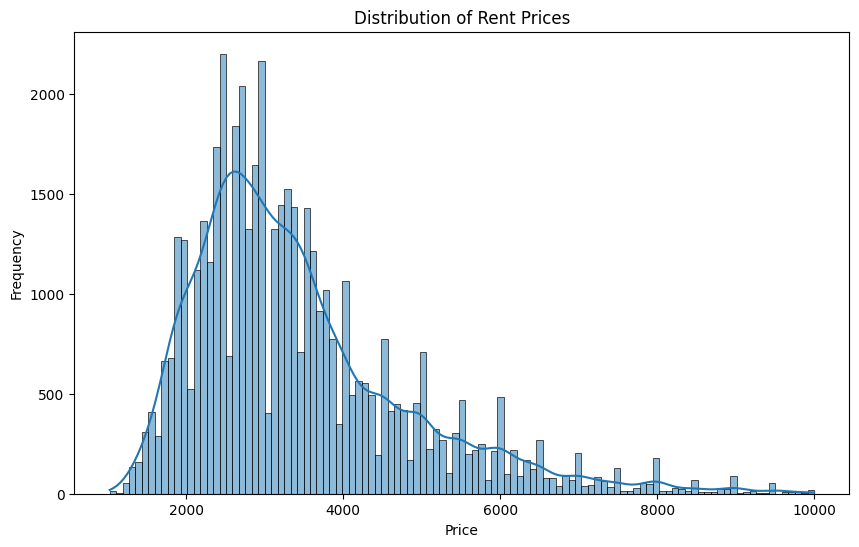

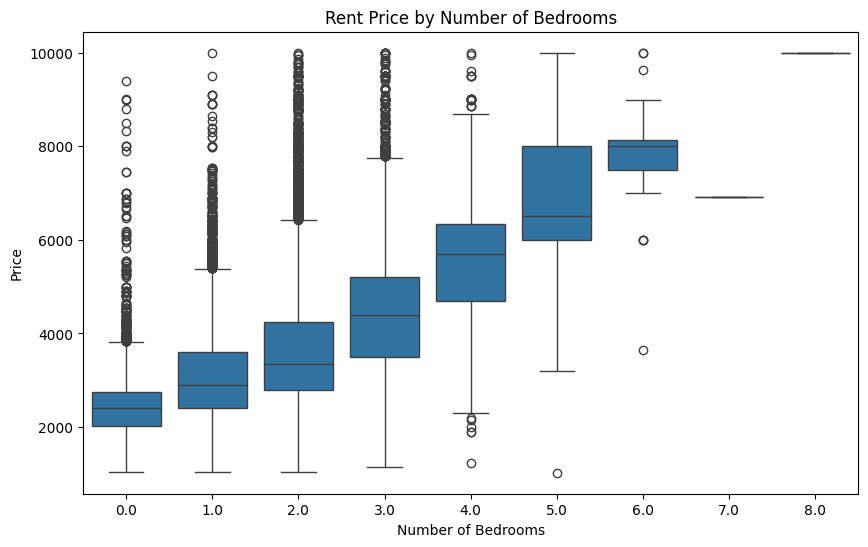

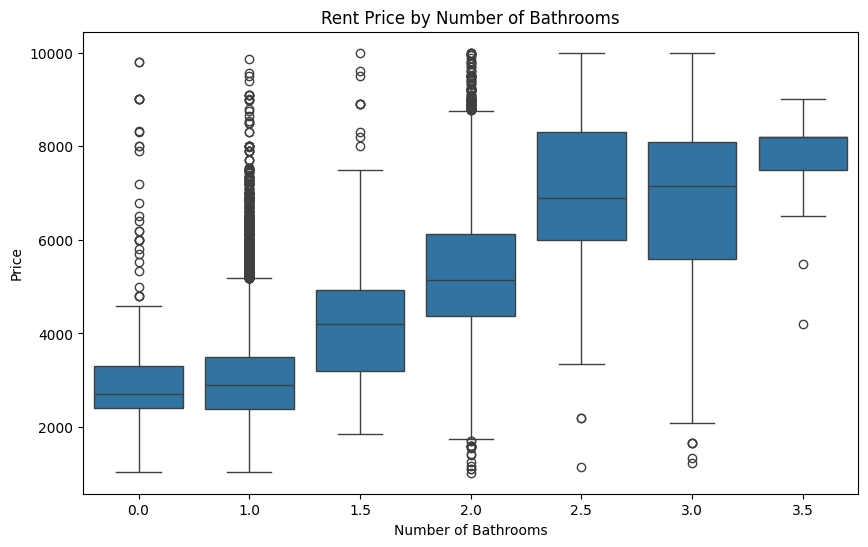

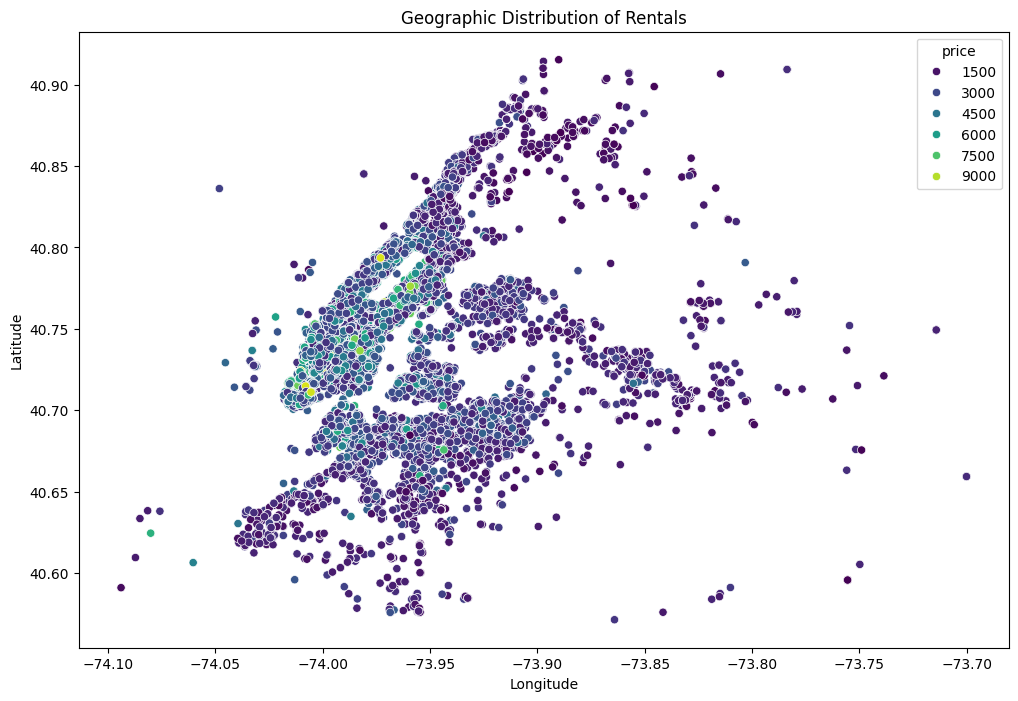

In [230]:
# Exploratory Data Analysis (EDA) visualization on the rent dataframe

# 2. Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(rent['price'], kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Relationship between bedrooms and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=rent)
plt.title('Rent Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

#4 Relationship between bathrooms and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=rent)
plt.title('Rent Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

# 5. Geographic distribution of rentals
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=rent, palette='viridis')
plt.title('Geographic Distribution of Rentals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Categorical Data Summary: We analyzed the unique values and their frequencies in categorical columns to understand the distribution of categorical features in the rental market.


In [231]:
# 9. Unique values in categorical columns
categorical_columns = rent.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(rent[col].value_counts())


Unique values in features:
features
[]                                                                                                                              3192
['Pre-War', 'Dogs Allowed', 'Cats Allowed']                                                                                     1391
['Cats Allowed', 'Dogs Allowed']                                                                                                1072
['Hardwood Floors']                                                                                                             1047
['Pre-War']                                                                                                                      937
                                                                                                                                ... 
['Cats Allowed', 'Dogs Allowed', 'Working Fireplace']                                                                              1
['Doorman', 'Fitness Center', 'L

### Removing data with bedrooms greater than 5 from the dataset

In this step, we will remove data points where the number of bedrooms is greater than or equal to 5. This decision is based on the observation that there are fewer than 200 such entries out of the 40,000+ rows in our dataset.

In [232]:
# Bedrooms count for the dataset
print(rent['bedrooms'].value_counts())


bedrooms
1.0    15717
2.0    14450
0.0     9435
3.0     6774
4.0     1693
5.0      154
6.0       28
8.0        1
7.0        1
Name: count, dtype: int64


In [233]:
rent = rent[rent['bedrooms'] <= 4 ]

Distribution of bedrooms updated


Distribution of bedrooms removing > 4:


/var/folders/fv/cybn9l2570jbqgz027rmgkbh0000gn/T/ipykernel_50990/1896565356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=rent, palette='viridis')


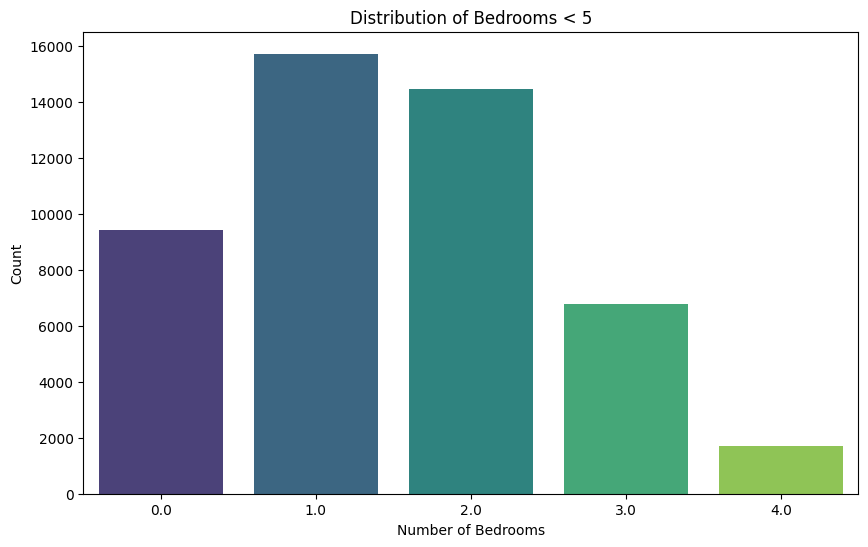

count    48069.000000
mean         1.491835
std          1.065685
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: bedrooms, dtype: float64

Updated number of data points for each bedroom category:
bedrooms
0.0     9435
1.0    15717
2.0    14450
3.0     6774
4.0     1693
Name: count, dtype: int64


In [234]:
# Print the updated summary statistics for bedrooms
print("\nDistribution of bedrooms removing > 4:")

# Plot the distribution of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=rent, palette='viridis')
plt.title('Distribution of Bedrooms < 5')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print summary statistics for bedrooms
print(rent['bedrooms'].describe())


# Print the updated number of data points for each bedroom category
updated_bedroom_counts = rent['bedrooms'].value_counts().sort_index()
print("\nUpdated number of data points for each bedroom category:")
print(updated_bedroom_counts)

### Removing NA from photos and filling with an empty list

In [235]:

rent['photos'] = rent['photos'].fillna('[]')
rent['photos'] = rent['photos'].apply(ast.literal_eval) # Converting string to list

In [236]:
type(rent['photos'][0])


list

## Feature Column Analysis and Visualization

This section of the code performs the following tasks:

1. Combines all features from the 'features' column into a single string
2. Cleans and preprocesses the text by removing punctuation, converting to lowercase, and lemmatizing
3. Generates a word cloud visualization from the processed features
4. Creates a table of unique feature counts

The word cloud provides a visual representation of the most common features in the rental listings,
while the table gives a more detailed breakdown of feature frequencies.


### Cleaning and lemmatizing features column per row

In [237]:
lemmatizer = WordNetLemmatizer()

# Function to clean and lemmatize text
def clean_and_lemmatize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Split the text into words
    words = text.split()
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a string
    return lemmatized_words

# Assuming 'rent' is your DataFrame containing the rental listings
# and 'features' is the column containing the rent features as a list of strings

# Apply the clean_and_lemmatize function to each feature in the 'features' column

rent['cleaned_features'] = rent['features'].apply(clean_and_lemmatize)

In [238]:
rent['cleaned_features'].head()


0    [dining, room, prewar, laundry, in, building, ...
1    [doorman, elevator, laundry, in, building, dis...
2    [doorman, elevator, laundry, in, building, lau...
3                                                   []
4    [doorman, elevator, fitness, center, laundry, ...
Name: cleaned_features, dtype: object

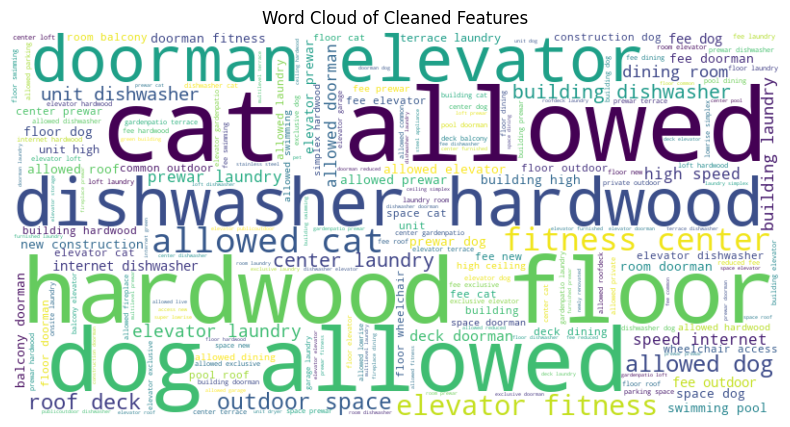


Top 20 Cleaned Features by Frequency:
            Count
allowed     44524
laundry     28494
in          28166
elevator    25398
hardwood    23904
cat         22968
floor       22903
dog         21486
doorman     20354
dishwasher  20069
building    18713
fee         18212
no          17578
center      12757
fitness     12746
prewar      10268
unit         9145
space        7219
outdoor      6870
deck         6447


In [239]:
# 11. Generate word cloud and create a table of unique counts from cleaned_features

# Combine all cleaned features into a single string
all_cleaned_features = ' '.join([' '.join(features) for features in rent['cleaned_features'] if isinstance(features, list)])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_features)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Features')
plt.show()

# Create a table of unique feature counts
cleaned_feature_counts = Counter([feature for features in rent['cleaned_features'] if isinstance(features, list) for feature in features])
cleaned_feature_df = pd.DataFrame.from_dict(cleaned_feature_counts, orient='index', columns=['Count'])
cleaned_feature_df = cleaned_feature_df.sort_values('Count', ascending=False)

print("\nTop 20 Cleaned Features by Frequency:")
print(cleaned_feature_df.head(20))

## Initial Naive Feature Engineering (Not used)

In our initial approach to feature engineering, we attempted to group the features list into binary variables. This was done to simplify the complex and varied feature descriptions into more manageable categories. The process involved:

1. Identifying key feature groups (e.g., laundry, pet-friendly, etc.)
2. Creating lists of keywords associated with each group
3. Using regex matching to search for these keywords in the cleaned features
4. Generating binary scores (0 or 1) for each feature group based on the presence of associated keywords

For example:
- We created a 'laundry_score' by searching for terms like 'laundry', 'washer', 'dryer'
- A 'pet_friendly_score' was derived from keywords such as 'pet', 'dog', 'cat'
- An 'other_features_score' captured miscellaneous amenities like 'high speed internet', 'loft', 'high ceiling'

While this approach seemed promising initially, we later decided to discard it for the following reasons:

1. Lack of predictive power: The binary variables created through this method did not significantly improve our model's predictive capabilities.
2. Loss of nuance: By reducing complex features to binary variables, we lost important nuances that could be valuable for prediction.
3. Interpretability issues: Although the goal was to improve interpretability, the resulting features were still not as clear and interpretable as we had hoped.
4. Potential for bias: The keyword lists were subjectively created, which could introduce bias into the feature selection process.

In subsequent iterations of our analysis, we opted for more sophisticated feature engineering techniques that better preserved the richness of the original data while still providing meaningful insights for our predictive models.


### Adding Binary Variables from Cleaned Features


In [240]:
def count_strings_in_list(column, word_list):
    """
    Count how many strings from word_list match (using regex) anywhere in each list of the given column.
    
    Parameters:
    column (pandas.Series): A column containing lists of strings
    word_list (list): A list of words to count
    
    Returns:
    pandas.Series: An integer series indicating the count of words from word_list found in each row
    """
    return column.apply(lambda x: sum(any(re.search(word, item, re.IGNORECASE) for item in x) for word in word_list))


In [241]:
## Other features
# Other features
other_features = [
    'high speed internet',
    'loft',
    'high ceiling',
    'reduced fee',
    'simplex',
    'lowrise',
    'multilevel',
    'green building'
]

# Count occurrences of other features
rent['other_features_score'] = count_strings_in_list(rent['cleaned_features'], other_features)

# Convert other_features_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['other_features_score'] = (rent['other_features_score'] > 0).astype(int)


In [242]:
## Laundry
## Laundry
laundry_features = [
    'laundry in unit',
    #'laundry in building',
    #'laundry room',
    #'onsite laundry',
    #'laundry'
]

# Count occurrences of laundry features
rent['laundry_in_unit'] = count_strings_in_list(rent['cleaned_features'], laundry_features)
# Convert laundry_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['laundry_in_unit'] = (rent['laundry_in_unit'] > 0).astype(int)


In [243]:
## Front desk amenities
front_desk_amenities = [
    'front desk',
    'elevator',
    'doorman',
    'wheelchair access',
    'concierge',
    'valet',
    'package service',
    'lobby attendant',
    'virtual doorman',
    'mail room'
]

# Count occurrences of building amenities
rent['front_desk_amenities_score'] = count_strings_in_list(rent['cleaned_features'], front_desk_amenities)
# Convert front_desk to binary (0 if no outdoor features, 1 if any outdoor features)
rent['front_desk_amenities_score'] = (rent['front_desk_amenities_score'] > 0).astype(int)

In [244]:
## Pet friendly score
pet_friendly_words = [
    'pet', 'dog', 'cat', 'pet friendly', 'dog friendly', 'cat friendly',
    'pet park', 'dog run', 'pet grooming', 'pet spa', 'pet washing station',
    'pet sitting', 'pet daycare', 'pet walking service', 'pet treats',
    'pet waste station', 'pet relief area', 'pet playground'
]
rent['pet_friendly_score'] = count_strings_in_list(rent['cleaned_features'], pet_friendly_words)

# Convert pet_friendly to binary (0 if no outdoor features, 1 if any outdoor features)
rent['pet_friendly_score'] = (rent['pet_friendly_score'] > 0).astype(int)

In [245]:
## Interior
interior_features = [
    'hardwood floor',
    'dining room',
    'hardwood',
    'fireplace',
    'furnished',
    'storage',
    'dishwasher',
    'high ceilings',
    'walk-in closet',
    'marble bathroom',
    'stainless steel appliances',
    'granite countertops',
    'exposed brick',
    'crown molding',
    'recessed lighting',
    'bay windows',
    'built-in bookshelves',
    'open floor plan',
    'renovated kitchen',
    'central air conditioning'
]

# Count occurrences of interior features
rent['interior_score'] = count_strings_in_list(rent['cleaned_features'], interior_features)

# Convert interior_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['interior_score'] = (rent['interior_score'] > 0).astype(int)

# Final Feature Engineering


### Building Age Classification

In our analysis of the New York rental marketplace, we recognized that the age of a building can significantly impact rental prices and desirability. To capture this aspect, we decided to create two distinct categories: new buildings and old buildings. We compiled lists of features typically associated with each category based on our understanding of the New York real estate market.

For new buildings, we identified features such as elevators, doormen, modern amenities like fitness centers and swimming pools, and specific mentions of new construction. These features are often indicative of more recent developments or extensively renovated properties.

On the other hand, for old buildings, we focused on characteristics that are commonly found in pre-war or historic properties. These include features like high ceilings, fireplaces, and the specific mention of "prewar" in the listing.

By categorizing properties based on these feature lists, we aim to capture the essence of building age without relying solely on explicit age data, which may not always be available or accurate in rental listings. This classification allows us to examine how building age correlates with rental prices and other factors in the New York City rental market.

The code implementation of this classification can be seen in the following cell, where we create binary variables for 'new_building' and 'old_building' based on the presence of these characteristic features in each listing.


In [246]:
# Define features for new and old buildings
new_building_features = ['elevator', 'doorman', 'dishwasher', 'fitness center', 'laundry in unit', 'swimming pool', 'new construction', 'wheelchair access', 'garage']
old_building_features = ['prewar', 'high ceiling', 'fireplace', 'laundry room']
# Create new categorical variables
# Create new categorical variable for new buildings
rent['new_building'] = rent['cleaned_features'].apply(lambda x: 1 if any(feature in x for feature in new_building_features) else 0)

# Create new categorical variable for old buildings
rent['old_building'] = rent['cleaned_features'].apply(lambda x: 1 if any(feature in x for feature in old_building_features) else 0)

# If a building is classified as old, set new_building to 0
rent.loc[rent['old_building'] == 1, 'new_building'] = 0

# Display the first few rows to verify the changes
print(rent[['old_building', 'new_building']].head(10))

# Display the first few rows to verify
print(rent[['new_building', 'old_building']].head())


   old_building  new_building
0             1             0
1             0             1
2             0             1
3             0             0
4             0             1
5             0             1
6             1             0
7             0             1
8             0             0
9             0             0
   new_building  old_building
0             0             1
1             1             0
2             1             0
3             0             0
4             1             0


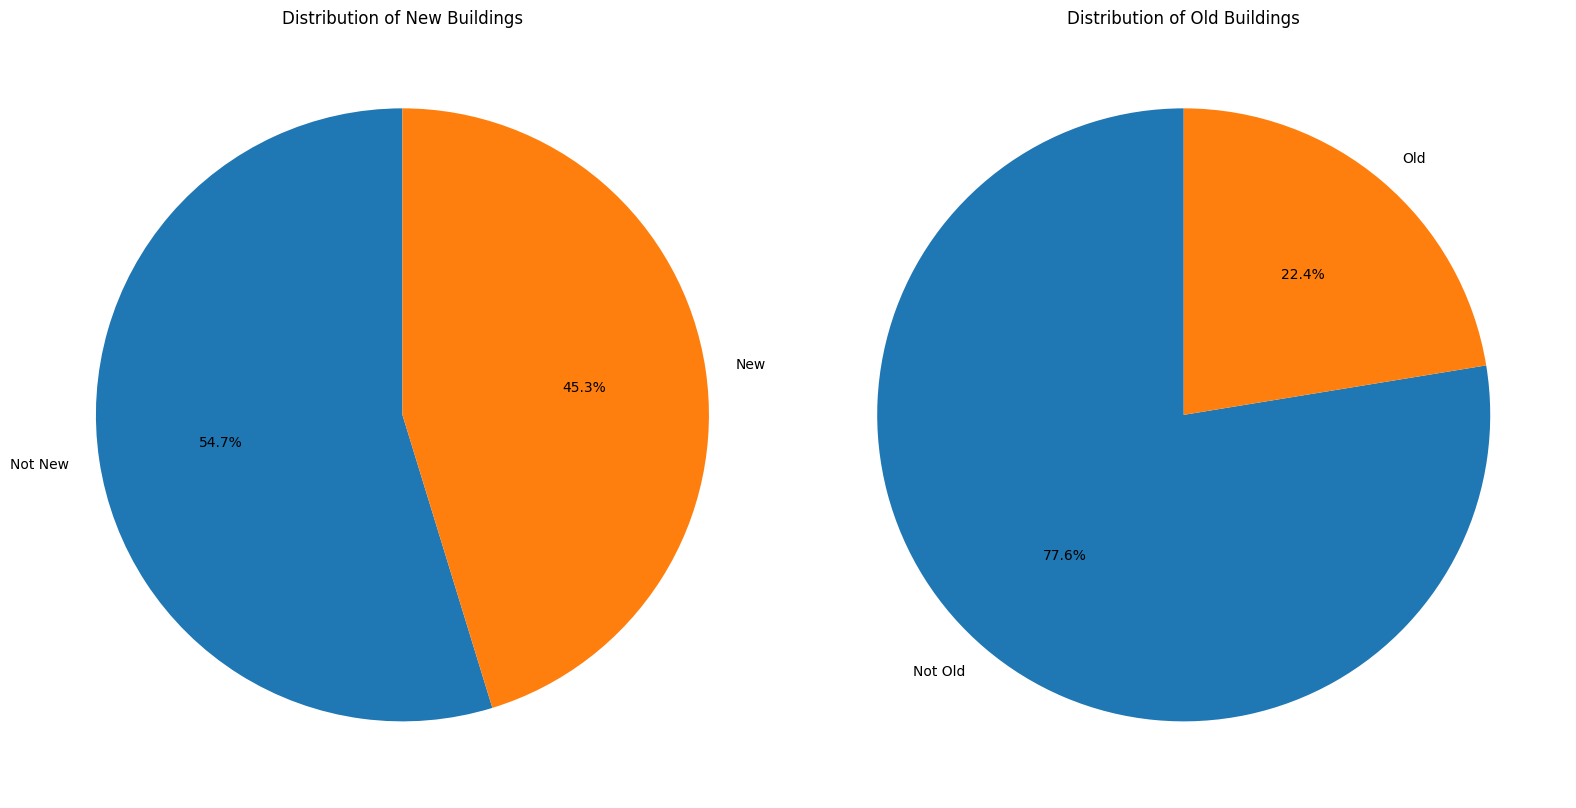

Percentage of New Buildings: 54.74006116207951 %
Percentage of Old Buildings: 22.41985479206973 %


In [247]:
# Create pie charts for new_building_score and old_building_score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for new_building_score
new_building_counts = rent['new_building'].value_counts()
ax1.pie(new_building_counts.values, labels=['Not New', 'New'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of New Buildings')

# Pie chart for old_building_score
old_building_counts = rent['old_building'].value_counts()
ax2.pie(old_building_counts.values, labels=['Not Old', 'Old'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Old Buildings')

plt.tight_layout()
plt.show()

# Print percentages
print("Percentage of New Buildings:", (new_building_counts[1] / len(rent)) * 100, "%")
print("Percentage of Old Buildings:", (old_building_counts[1] / len(rent)) * 100, "%")


Final results of feature engineering

### Borough Classification

In our analysis of the New York City rental market, we recognized the importance of location in determining rental prices. To capture this crucial aspect, we implemented a borough classification system based on the latitude and longitude coordinates of each listing.

We defined five distinct categories corresponding to the five boroughs of New York City:

1. Brooklyn
2. Staten Island
3. Queens
4. Manhattan
5. Bronx

Additionally, we included a category 0 for any listings that fall outside the defined geographical boundaries of the five boroughs.

The classification was implemented using a custom function `get_borough()` that takes latitude and longitude as inputs and returns a categorical value representing the borough. This function uses a series of conditional statements to check if the given coordinates fall within the predefined boundaries of each borough.

The borough categories were then added to our dataset as a new column 'borough_cat'. This allows us to analyze how rental prices and other factors vary across different areas of New York City, providing valuable insights into the geographical aspects of the rental market.

In the subsequent visualizations, we'll explore how this borough classification relates to rental prices, helping us understand the impact of location on the New York City rental landscape.


In [248]:

def get_borough(lat, lon):
    if (40.9176 >= lat >= 40.7850) and (-73.9105 >= lon >= -74.2591):  # Bronx
        return 5
    elif (40.9153 >= lat >= 40.5763) and (-73.7004 >= lon >= -74.2591):  # Manhattan
        return 4
    elif (40.8500 >= lat >= 40.5000) and (-73.7004 >= lon >= -73.9500):  # Queens
        return 3
    elif (40.7410 >= lat >= 40.5600) and (-74.0500 >= lon >= -74.2591):  # Staten Island
        return 2
    elif (40.739446 >= lat >= 40.541722) and (-73.951442 >= lon >= -74.044582):  # Brooklyn
        return 1
    else:
        return 0  # For any lat/lon outside the defined ranges
# Apply the function to each row in the dataframe
rent['borough_cat'] = rent.apply(lambda row: get_borough(row['latitude'], row['longitude']), axis=1)


In [249]:
# Display the updated dataframe
rent.head()

,bedrooms,bathrooms,latitude,longitude,price,features,interest_level,display_address,photos,cleaned_features,other_features_score,laundry_in_unit,front_desk_amenities_score,pet_friendly_score,interior_score,new_building,old_building,borough_cat
0,1.0,1.0,40.7108,-73.9539,2400.0,"['Dining Room', 'Pre-War', 'Laundry in Buildin...",medium,145 Borinquen Place,[https://photos.renthop.com/2/7170325_3bb5ac84...,"[dining, room, prewar, laundry, in, building, ...",0,0,0,1,1,0,1,4
1,2.0,1.0,40.7513,-73.9722,3800.0,"['Doorman', 'Elevator', 'Laundry in Building',...",low,East 44th,[https://photos.renthop.com/2/7092344_7663c19a...,"[doorman, elevator, laundry, in, building, dis...",0,0,1,0,1,1,0,4
2,2.0,1.0,40.7575,-73.9625,3495.0,"['Doorman', 'Elevator', 'Laundry in Building',...",medium,East 56th Street,[https://photos.renthop.com/2/7158677_c897a134...,"[doorman, elevator, laundry, in, building, lau...",0,0,1,0,1,1,0,4
3,3.0,1.5,40.7145,-73.9425,3000.0,[],medium,Metropolitan Avenue,[https://photos.renthop.com/2/7211212_1ed4542e...,[],0,0,0,0,0,0,0,4
4,0.0,1.0,40.7439,-73.9743,2795.0,"['Doorman', 'Elevator', 'Fitness Center', 'Lau...",low,East 34th Street,[https://photos.renthop.com/2/7225292_901f1984...,"[doorman, elevator, fitness, center, laundry, ...",0,0,1,0,0,1,0,4


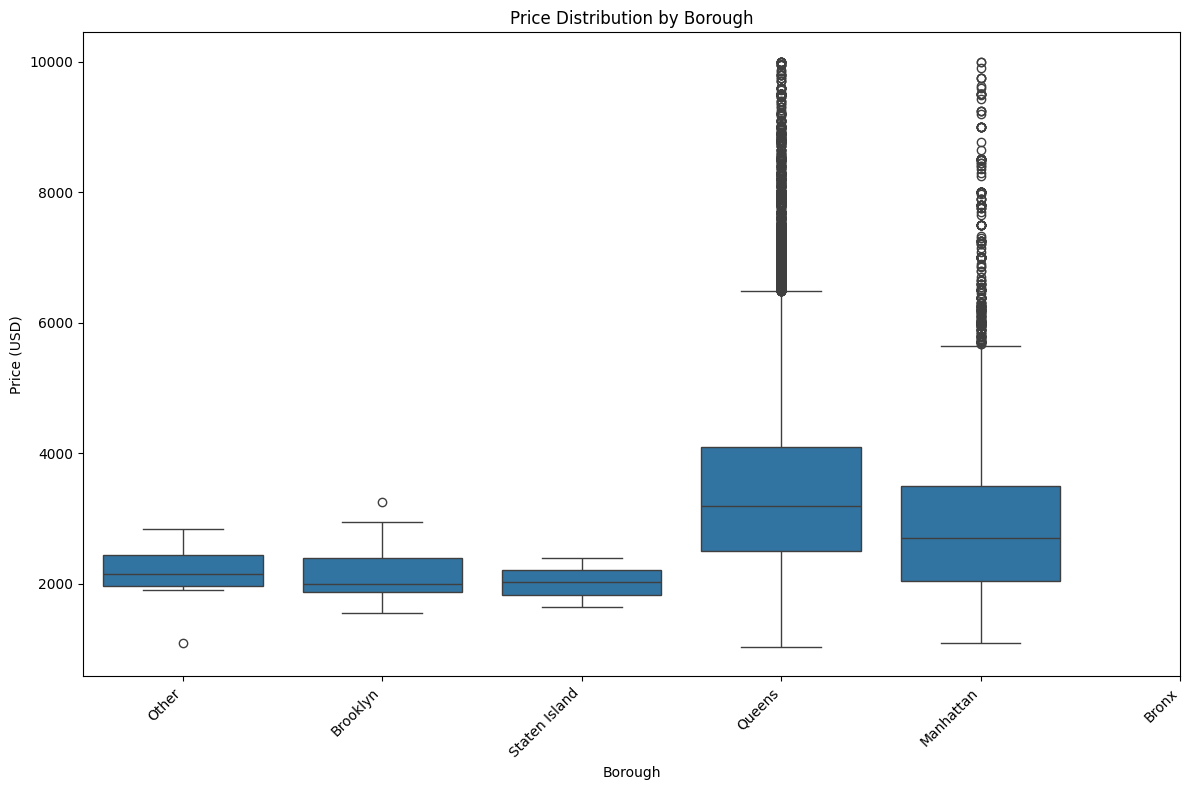

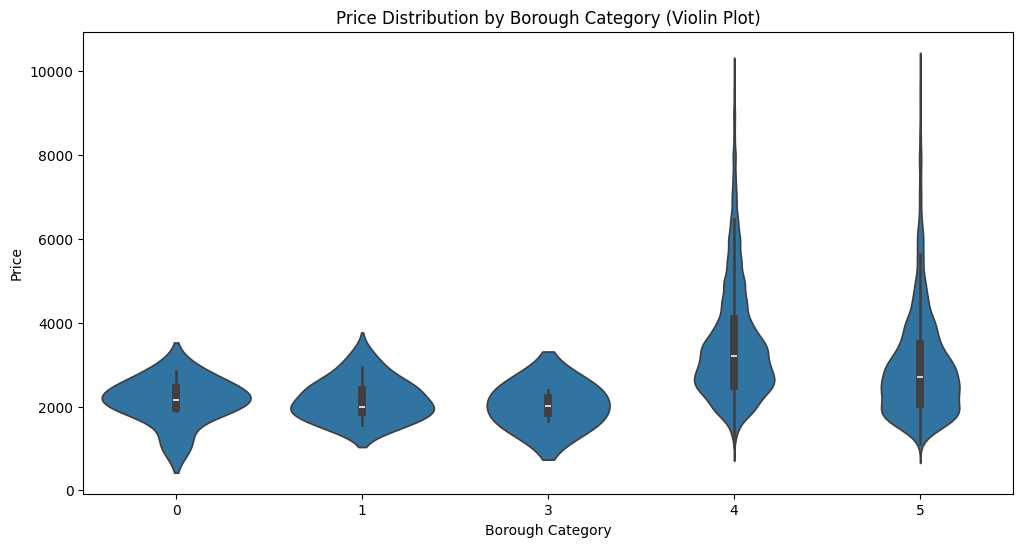


Average Price by Borough Category:
borough_cat
0    2131.125000
1    2171.818182
3    2022.500000
4    3493.655531
5    2968.507481
Name: price, dtype: float64


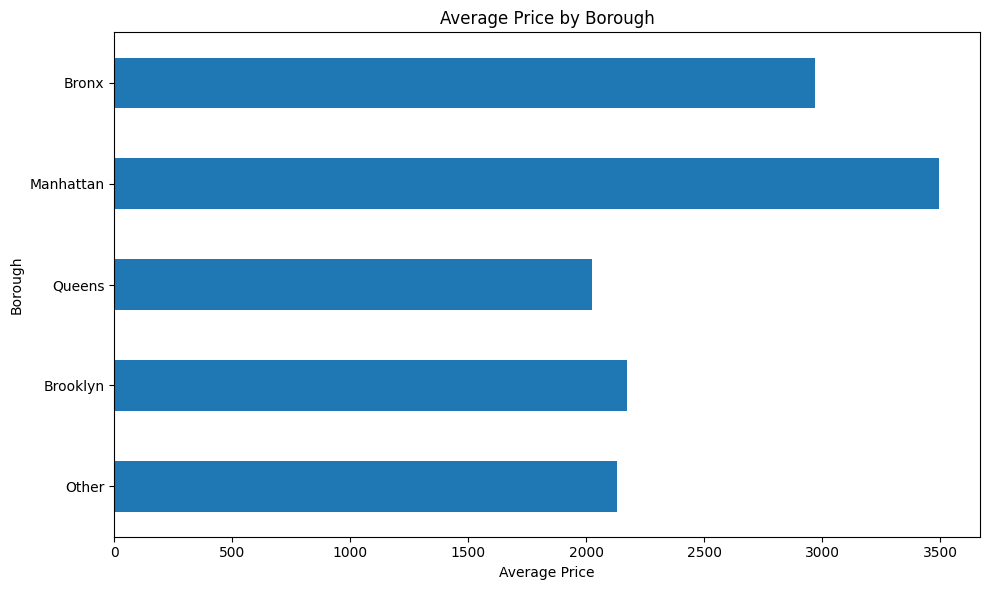

In [250]:
# Create the box plot of borough category vs price distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='borough_cat', y='price', data=rent)
plt.xticks([0, 1, 2, 3, 4, 5], ['Other', 'Brooklyn', 'Staten Island', 'Queens', 'Manhattan', 'Bronx'], rotation=45, ha='right')
plt.title('Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

# Create a violin plot of Price vs Borough Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='borough_cat', y='price', data=rent)
plt.title('Price Distribution by Borough Category (Violin Plot)')
plt.xlabel('Borough Category')
plt.ylabel('Price')
plt.show()

# Calculate and print average price per borough category
avg_price_by_borough = rent.groupby('borough_cat')['price'].mean()
print("\nAverage Price by Borough Category:")
print(avg_price_by_borough)




# Create a horizontal bar plot of average price by borough category
plt.figure(figsize=(10, 6))
avg_price_by_borough.plot(kind='barh')
plt.title('Average Price by Borough')
plt.xlabel('Average Price')
plt.ylabel('Borough')
plt.yticks([0, 1, 2, 3, 4], ['Other', 'Brooklyn', 'Queens', 'Manhattan', 'Bronx'])
plt.tight_layout()
plt.show()



In [251]:
# Calculate the number of listings per borough category
listings_per_borough = rent['borough_cat'].value_counts().sort_index()
print(listings_per_borough)


borough_cat
0        8
1       22
3        2
4    41487
5     6550
Name: count, dtype: int64


# Number of Photos Analysis

The number of photos provided for each rental listing could be an important factor that could potentially influence the interest level and pricing of the property. A higher number of photos might indicate that the landlord or property manager is putting more effort into marketing the property, which could lead to increased interest and potentially higher prices.

To analyze this, we created a 'num_photos' variable by counting the number of photos for each listing. This allows us to examine how the number of photos relates to other variables in our dataset.

Key points to investigate:

1. Distribution of the number of photos across listings
2. Correlation between the number of photos and the price of the rental
3. Relationship between the number of photos and the interest level
4. Variation in the number of photos across different boroughs

By examining these relationships, we can gain insights into how the number of photos might impact the rental market dynamics. This analysis will contribute to our understanding of factors influencing rental prices and interest levels in New York City.


In [253]:
# Create num_photos variable with the length of the photos column
# Create num_photos variable with the length of the photos column, excluding float values
rent['num_photos'] = rent['photos'].apply(lambda x: len(x) if isinstance(x, list) else 0)


# Display the first few rows to verify
print(rent[['photos', 'num_photos']].head())

                                              photos  num_photos
0  [https://photos.renthop.com/2/7170325_3bb5ac84...          12
1  [https://photos.renthop.com/2/7092344_7663c19a...           6
2  [https://photos.renthop.com/2/7158677_c897a134...           6
3  [https://photos.renthop.com/2/7211212_1ed4542e...           5
4  [https://photos.renthop.com/2/7225292_901f1984...           4


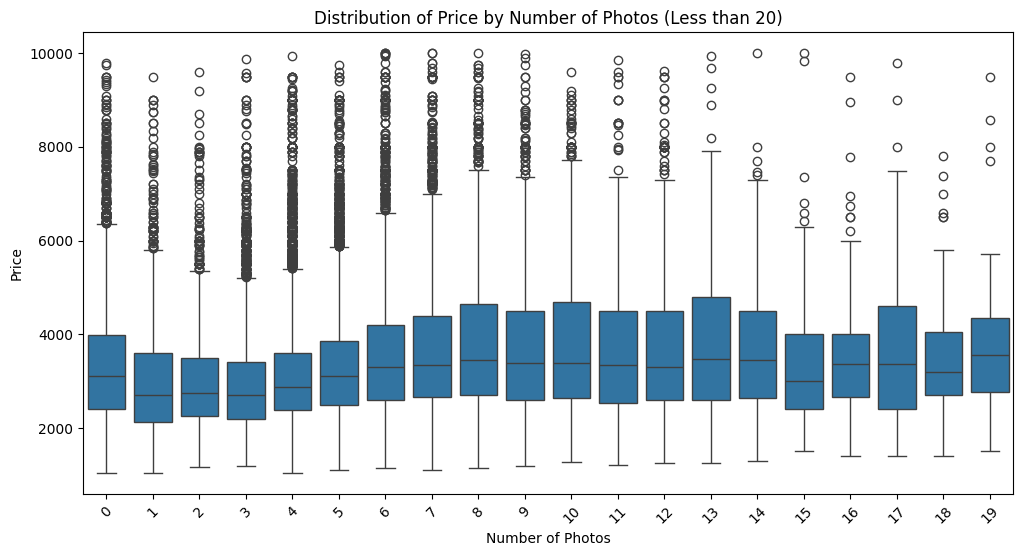

In [254]:
# Box plot of Number of Photos by Price (for photos less than 20)
plt.figure(figsize=(12, 6))
sns.boxplot(x='num_photos', y='price', data=rent[rent['num_photos'] < 20])
plt.title('Distribution of Price by Number of Photos (Less than 20)')
plt.xlabel('Number of Photos')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


# Linear Regression, ANOVA, and Model Diagnostics

In this section, we will perform linear regression analysis, ANOVA, and check diagnostics for three different models:

1. Model 1: `price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat) + num_photos`
2. Model 2: `price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat)`
3. Model 3: `price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + latitude + longitude`
4. Model 4: `log(price) ~ bedrooms + bathrooms + C(new_building) + C(old_building) + latitude + longitude`
5. Model 5: `log(price) ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat) + latitude + longitude`

We will analyze each model to understand the impact of different variables on rental prices in New York City. This analysis will help us determine which factors are most significant in predicting rental prices and how well our models perform.

For each model, we will:
1. Perform linear regression
2. Conduct ANOVA to assess the significance of variables
3. Check model diagnostics, including:
   - R-squared value
   - Adjusted R-squared
   - F-statistic
   - Residual analysis
   - Multicollinearity (VIF)

By comparing these models, we can gain insights into the relative importance of factors such as location (borough or latitude/longitude), building characteristics (new or old), and listing details (number of photos) in determining rental prices.

### Model 1: Price ~ Bedrooms + Bathrooms + New Building + Old Building + Borough + Number of Photos

This model incorporates basic apartment features (bedrooms and bathrooms), building characteristics (new or old), location (borough), and listing quality (number of photos) to predict rental prices in New York City.


In [255]:
# Select features for regression
# Use all features from the rent DataFrame
X = rent.drop('price', axis=1)
y = rent['price']

formula = 'price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat) + num_photos'

ols_model = ols(formula, data=rent).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     5843.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:36:59   Log-Likelihood:            -3.9789e+05
No. Observations:               48069   AIC:                         7.958e+05
Df Residuals:                   48059   BIC:                         7.959e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -579.9052 

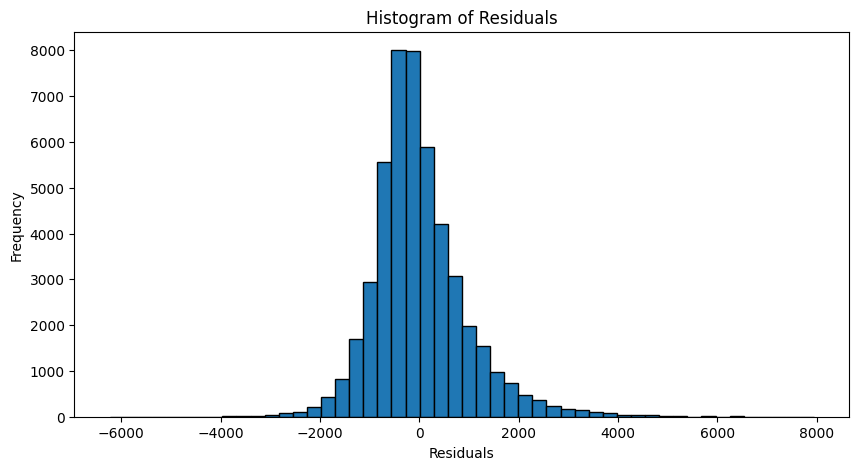

<Figure size 1000x500 with 0 Axes>

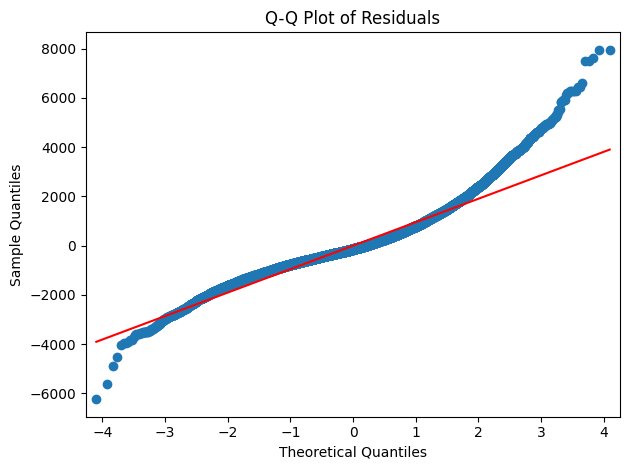

In [256]:
## Plot histogram of residuals and QQ plot

# Calculate residuals
residuals = ols_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

### Model 2: Multiple Linear Regression with Additional Features

This model expands on the previous one by incorporating more variables:
`price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat)`

It aims to provide a more comprehensive analysis of factors affecting rental prices in NYC.


In [257]:
formula = 'price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat)'

ols_model = ols(formula, data=rent).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     6541.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:37:00   Log-Likelihood:            -3.9795e+05
No. Observations:               48069   AIC:                         7.959e+05
Df Residuals:                   48060   BIC:                         7.960e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -483.4295 

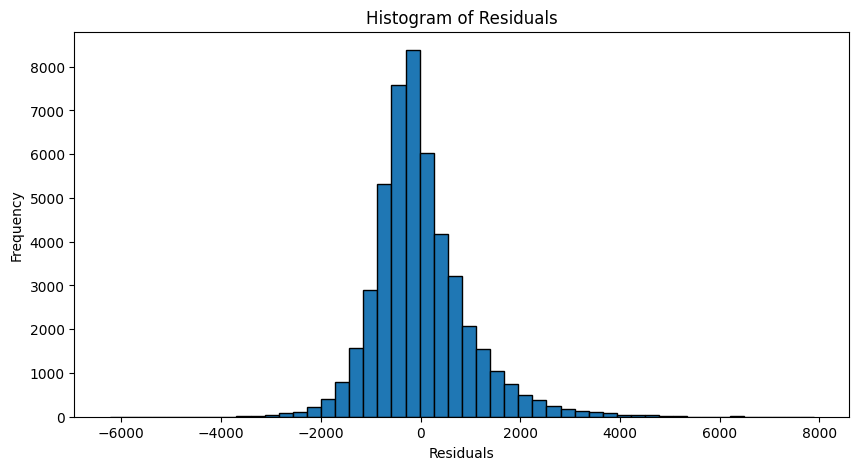

<Figure size 1000x500 with 0 Axes>

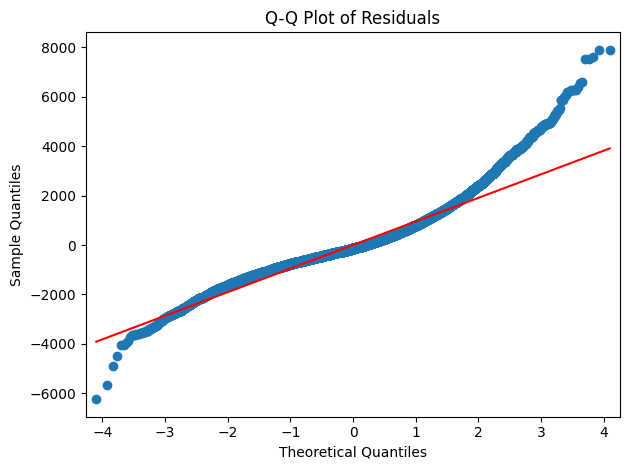

In [258]:
## Plot histogram of residuals and QQ plot

# Calculate residuals
residuals = ols_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

### Model 3: Multiple Linear Regression with Additional Features

This model replaces the borough category with latitude and longitude:
`price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + latitude + longitude`


In [259]:
formula = 'price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + latitude + longitude'

ols_model = ols(formula, data=rent).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:37:00   Log-Likelihood:            -3.9453e+05
No. Observations:               48069   AIC:                         7.891e+05
Df Residuals:                   48062   BIC:                         7.891e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -1.11e+06 

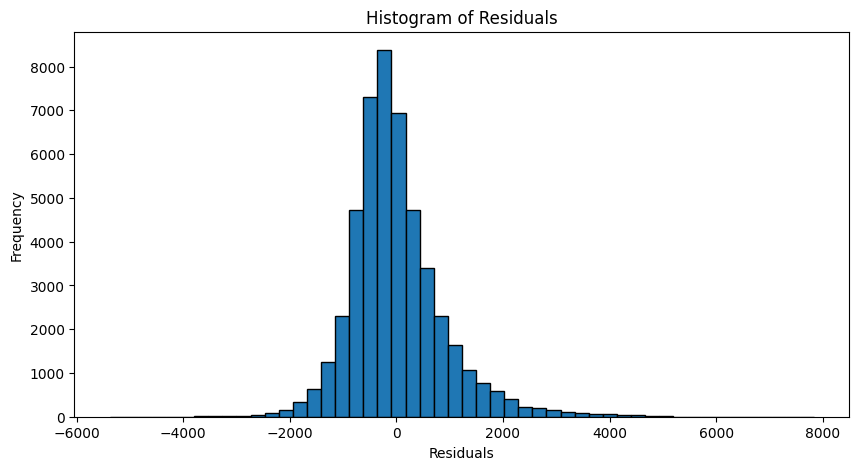

<Figure size 1000x500 with 0 Axes>

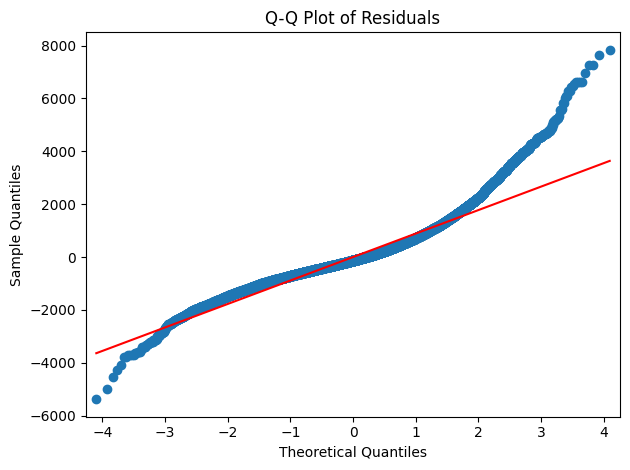

In [260]:
## Plot histogram of residuals and QQ plot

# Calculate residuals
residuals = ols_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

### Model 4: OLS Regression with Log-Transformed Price

In this section, we'll perform an Ordinary Least Squares (OLS) regression using a log-transformed price as the dependent variable. The model formula is:

`log(price) ~ bedrooms + bathrooms + C(new_building) + C(old_building) + latitude + longitude`

This model aims to capture the relationship between the log-transformed rental price and key features, including the number of bedrooms and bathrooms, whether the building is new or old, and the geographical location (latitude and longitude). By using the log-transformed price, we can potentially address non-linearity in the price variable and interpret the coefficients as percentage changes in price.

We'll analyze the model's performance, examine the residuals, and investigate influential points and potential outliers, similar to our previous models.


In [261]:
# Add log(price) to the dataset
rent['log_price'] = np.log(rent['price'])

formula = 'log_price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + latitude + longitude'

ols_model = ols(formula, data=rent).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:37:01   Log-Likelihood:                 1894.9
No. Observations:               48069   AIC:                            -3776.
Df Residuals:                   48062   BIC:                            -3714.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -352.5919 

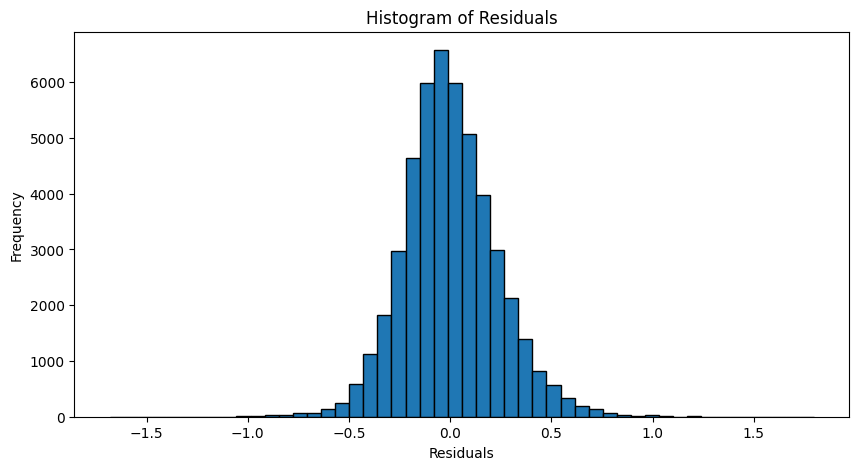

<Figure size 1000x500 with 0 Axes>

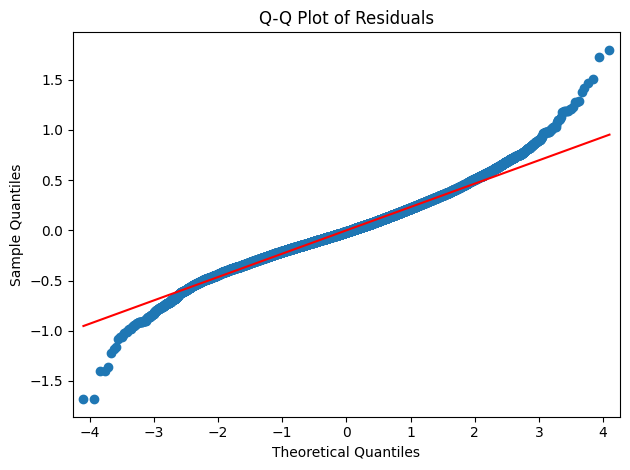

In [262]:
## Plot histogram of residuals and QQ plot

# Calculate residuals
residuals = ols_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

### Model 5: OLS Regression with Log-Transformed Price and Borough Category + latitude + longitude
OLS regression with log-transformed price as the dependent variable, incorporating bedrooms, bathrooms, building age (new/old), borough category, latitude, and longitude as predictors. This model aims to capture geographical and categorical effects on rental prices.


In [263]:
# Add log(price) to the dataset
rent['log_price'] = np.log(rent['price'])

formula = 'log_price ~ bedrooms + bathrooms + C(new_building) + C(old_building) + C(borough_cat) + latitude + longitude'

ols_model = ols(formula, data=rent).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     8119.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:37:01   Log-Likelihood:                 3224.0
No. Observations:               48069   AIC:                            -6426.
Df Residuals:                   48058   BIC:                            -6329.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -389.1381 

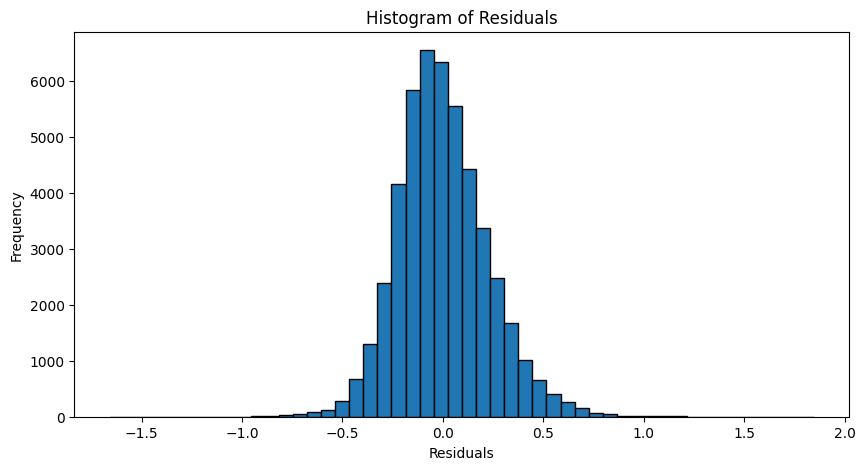

<Figure size 1000x500 with 0 Axes>

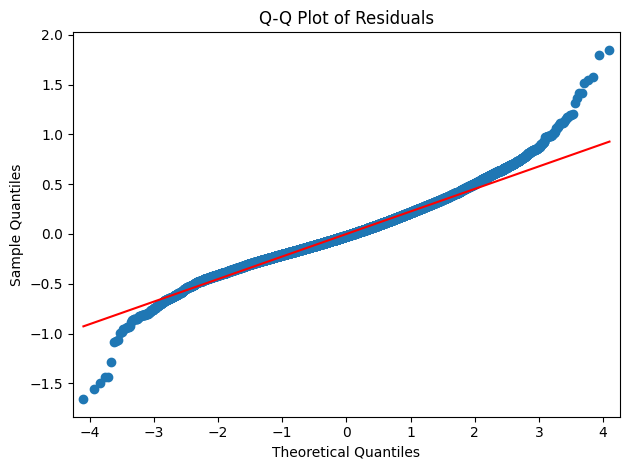

In [264]:
## Plot histogram of residuals and QQ plot

# Calculate residuals
residuals = ols_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

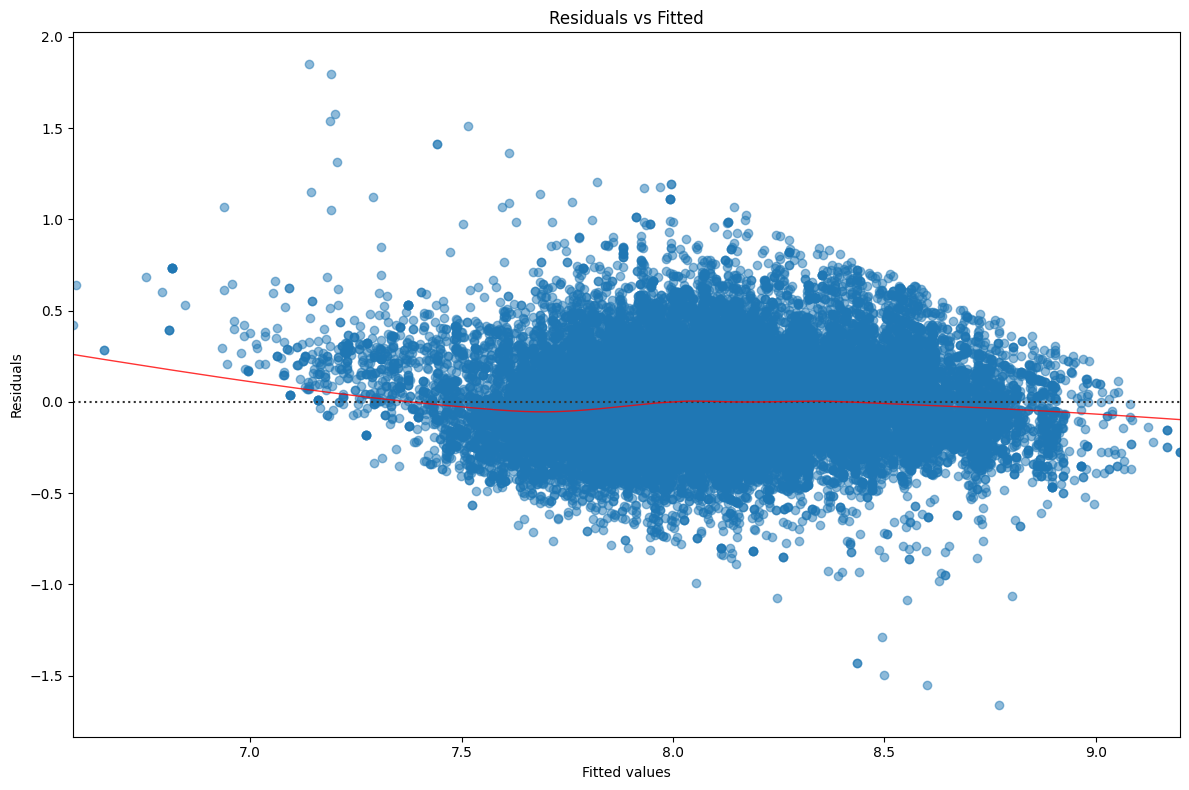

In [279]:
# Residual vs Fitted Plot for the Final Model

# Create predictions
X = rent.drop('price', axis=1)
y = rent['log_price']
y_pred = ols_model.predict(X)

# Calculate residuals
residuals = y - y_pred

plot_lm_1 = plt.figure(figsize=(12, 8))
ax = plot_lm_1.add_subplot(111)
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)

ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.tight_layout()
plt.show()

# Variance Inflation Factor (VIF) and Correlation Check

To assess the multicollinearity in our model, we'll examine the Variance Inflation Factor (VIF) and correlation matrix for the predictor variables. These analyses help us understand the relationships between our independent variables and identify potential issues that could affect the reliability of our regression model.

## Correlation Matrix

We'll start by generating a correlation matrix heatmap. This visualization will help us identify any strong correlations between our predictor variables. High correlations between independent variables can lead to unstable and unreliable coefficient estimates in our regression model.

## Variance Inflation Factor (VIF)

Next, we'll calculate the Variance Inflation Factor (VIF) for each predictor variable. VIF quantifies the extent of correlation between one predictor and the other predictors in the model. It provides an index that measures how much the variance of an estimated regression coefficient is increased due to collinearity.

- A VIF of 1 indicates no correlation between the predictor and the other variables.
- we are taking VIF values between 1 and 5 as low to moderate correlation and any VIF values greater than 5 to 10 as indicating high correlation



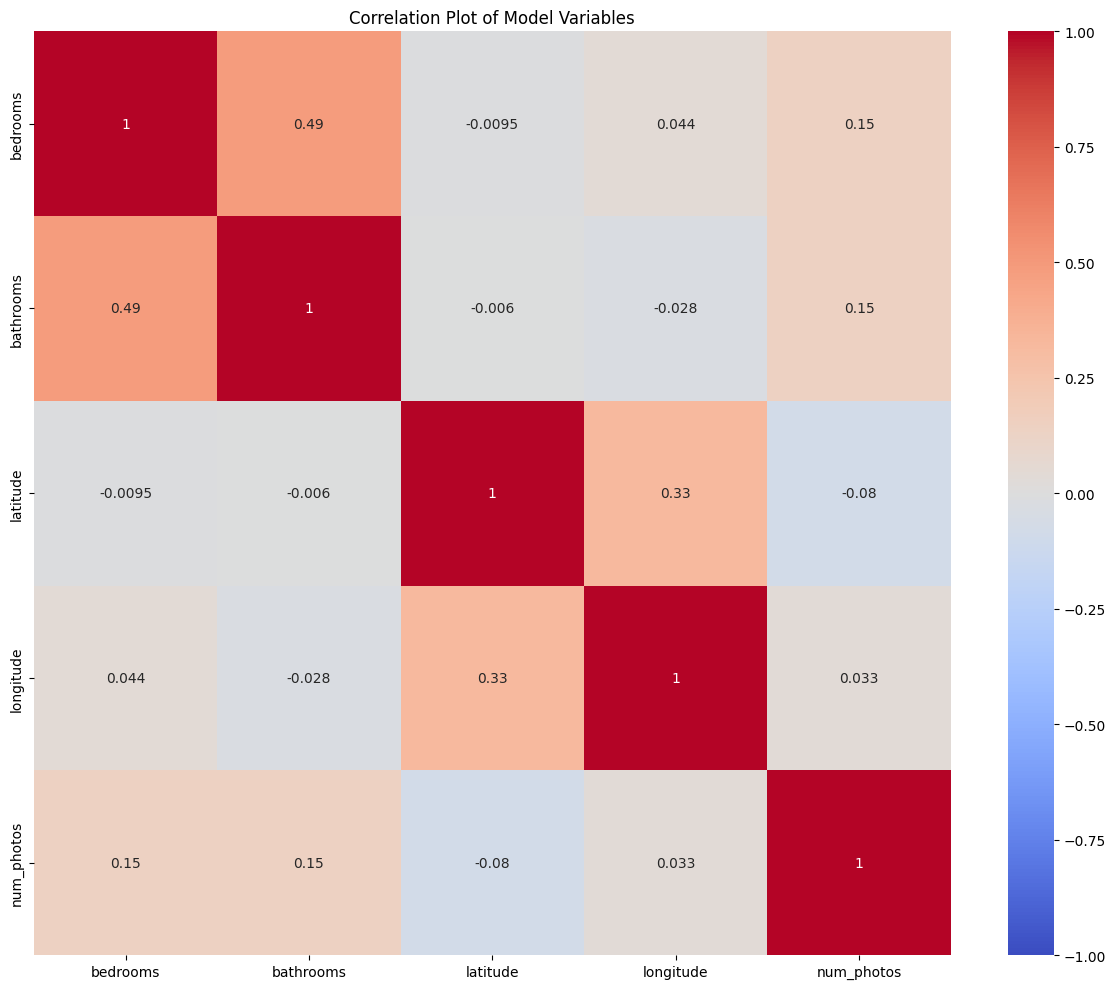


 Variance Inflation Factors:
     Variable           VIF
0       const  1.020727e+07
1    bedrooms  1.330867e+00
2   bathrooms  1.330406e+00
3    latitude  1.131055e+00
4   longitude  1.130851e+00
5  num_photos  1.040294e+00


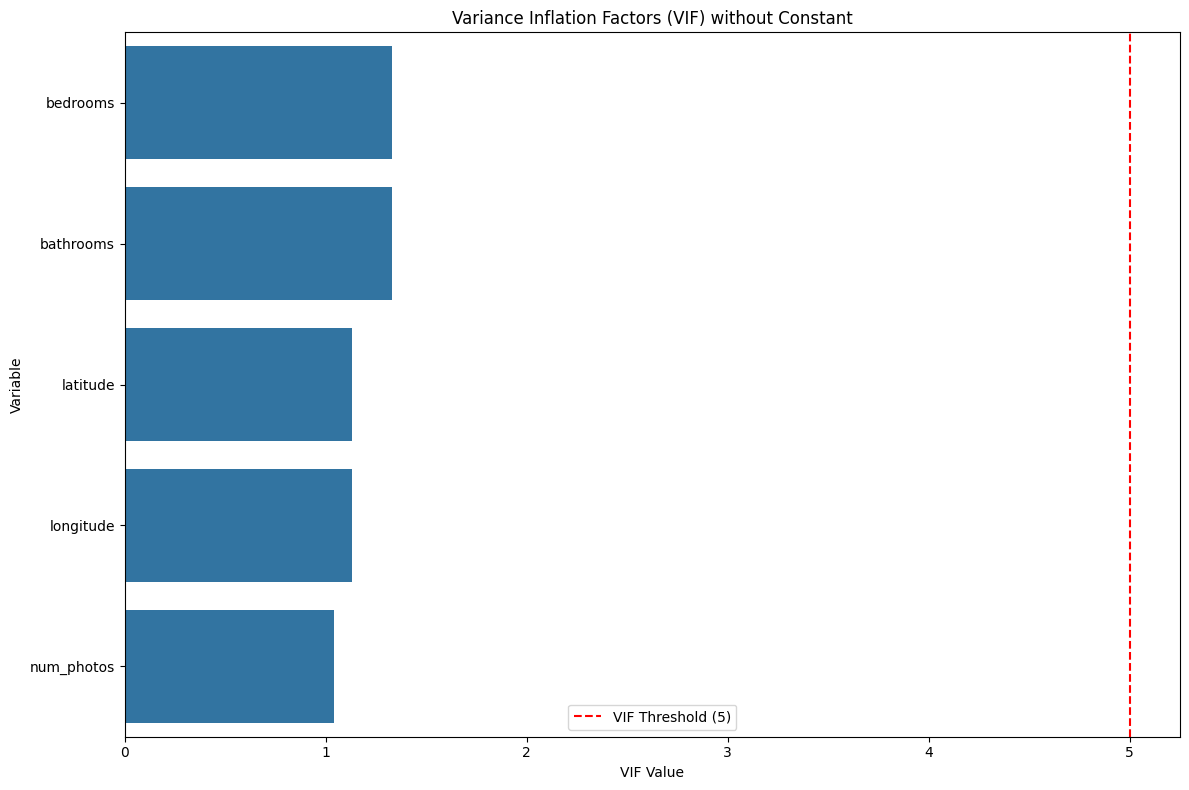


No variables have VIF > 5


In [265]:
# Calculate VIF for the variables in the model
X = rent[['bedrooms', 'bathrooms', 'latitude', 'longitude', 'num_photos']]
# Correlation plot
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Plot of Model Variables')
plt.tight_layout()
plt.show()


## VIF and Dummies
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n Variance Inflation Factors:")
print(vif)
### Plot VIF without the constant
# Remove the constant term and sort VIF values in descending order
vif_no_const = vif[vif['Variable'] != 'const'].sort_values('VIF', ascending=False).reset_index(drop=True)

# Create a bar plot of VIF values
plt.figure(figsize=(12, 8))
sns.barplot(x='VIF', y='Variable', data=vif_no_const)
plt.title('Variance Inflation Factors (VIF) without Constant')
plt.xlabel('VIF Value')
plt.ylabel('Variable')
plt.axvline(x=5, color='r', linestyle='--', label='VIF Threshold (5)')
plt.legend()
plt.tight_layout()
plt.show()

# Print variables with VIF > 5
high_vif = vif_no_const[vif_no_const['VIF'] > 5]
if not high_vif.empty:
    print("\nVariables with VIF > 5:")
    print(high_vif)
else:
    print("\nNo variables have VIF > 5")


# Correlation and VIF Analysis Results

Based on the correlation plot and Variance Inflation Factor (VIF) analysis conducted above, we can conclude that there are no major issues with multicollinearity among our selected variables:

1. The correlation plot shows no extremely high correlations between the independent variables.
2. All VIF values are well below the common threshold of 5, indicating low multicollinearity.

This suggests that our chosen variables (bedrooms, bathrooms, latitude, longitude, and num_photos) are suitable for use in our regression model without concerns about multicollinearity affecting the model's stability or interpretability.


In [266]:
# # Influence Plot with Cook's Distance

# # First, we need to fit our model
# import statsmodels.api as sm

# # Assuming y is your target variable (price) and X is your feature matrix
# model = sm.OLS(y, X).fit()

# # Create the influence plot
# fig, ax = plt.subplots(figsize=(12, 8))
# sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

# # Customize the plot
# plt.title("Influence Plot with Cook's Distance")
# plt.xlabel("Normalized residuals^2")
# plt.ylabel("Leverage")
# plt.tight_layout()
# plt.show()

# # Identify influential points
# influence = model.get_influence()
# (c, p) = influence.cooks_distance
# threshold = 4 / len(X)  # Common rule of thumb for Cook's Distance threshold

# influential_points = X[c > threshold]

# if len(influential_points) > 0:
#     print(f"\nNumber of influential points: {len(influential_points)}")
#     print("\nTop 10 most influential points:")
#     print(influential_points.head(10))
# else:
#     print("\nNo influential points found based on Cook's Distance threshold.")
